In [1]:
pwd

'/home/wsuser/work'

In [2]:
import cv2
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Flatten, MaxPooling2D, Dropout
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


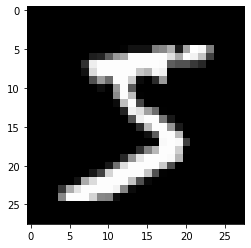

5


In [4]:
## Looking at a sample
plt.imshow(X_train[0], cmap="gray")
plt.show()
print (y_train[0])

In [5]:
## Checking out the shapes involved in dataset
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [6]:
# Reshaping so as to convert images for our model
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [7]:
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28, 1)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28, 1)
Shape of y_test: (10000,)


In [8]:
### Lets one hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
## Declare the model
model = Sequential()

## Declare the layers
layer_1 = Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1))
layer_2 = MaxPooling2D(pool_size=2)
layer_3 = Conv2D(32, kernel_size=3, activation='relu')
layer_4 = MaxPooling2D(pool_size=2)
layer_5 = Dropout(0.5)
layer_6 = Flatten()
layer_7 = Dense(128, activation="relu")
layer_8 = Dropout(0.5)
layer_9 = Dense(10, activation='softmax')

## Add the layers to the model
model.add(layer_1)
model.add(layer_2)
model.add(layer_3)
model.add(layer_4)
model.add(layer_5)
model.add(layer_6)
model.add(layer_7)
model.add(layer_8)
model.add(layer_9)

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 60s 32ms/step - loss: 0.8767 - accuracy: 0.7771 - val_loss: 0.1085 - val_accuracy: 0.9670
Epoch 2/3
1875/1875 [==============================] - 60s 32ms/step - loss: 0.2678 - accuracy: 0.9200 - val_loss: 0.0766 - val_accuracy: 0.9766
Epoch 3/3
1875/1875 [==============================] - 58s 31ms/step - loss: 0.1959 - accuracy: 0.9413 - val_loss: 0.0721 - val_accuracy: 0.9773


Prediction (Softmax) from the neural network:

 [[9.9999988e-01 6.9308153e-12 4.5249759e-09 4.6874649e-10 1.7797921e-10
  3.1712178e-11 6.1376428e-09 1.2189676e-10 4.2375795e-08 2.9630451e-08]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


--------- Prediction --------- 




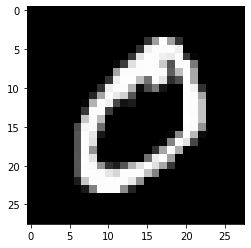



Final Output: 0


In [12]:
example = X_train[1]
prediction = model.predict(example.reshape(1, 28, 28, 1))
print ("Prediction (Softmax) from the neural network:\n\n {}".format(prediction))
hard_maxed_prediction = np.zeros(prediction.shape)
hard_maxed_prediction[0][np.argmax(prediction)] = 1
print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))

print ("\n\n--------- Prediction --------- \n\n")
plt.imshow(example.reshape(28, 28), cmap="gray")
plt.show()
print("\n\nFinal Output: {}".format(np.argmax(prediction)))





----------------Contoured Image--------------------


[ WARN:0@335.274] global ../modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('test_image.jpg'): can't open/read file: check file path/integrity


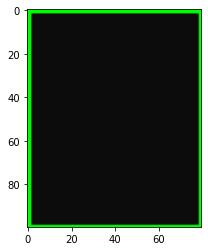

In [15]:
image = cv2.imread('test_image.jpg')
image = np.full((100,80,3), 12, dtype = np.uint8)
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
contours,hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
preprocessed_digits = []

for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # Resizing that digit to (18, 18)
    resized_digit = cv2.resize(digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)

print("\n\n\n----------------Contoured Image--------------------")
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_34f2913f79dd4b1b9693d877bf1e3b72 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='LvCXgkvxRMaY4f0OG5GlXpBS-Y6uo7EtRqeewYYE2bWC',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')


print=("\n\n\n----------------Contoured Image--------------------")
plt.imshow(image, cmap="gray")
plt.show()
    
inp = np.array(preprocessed_digits)

1/1 [==============================] - 0s 24ms/step


---------------------------------------


=========PREDICTION============ 




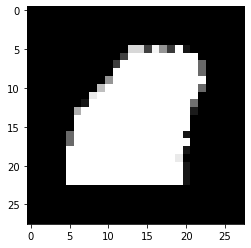



Final Output: 0

Prediction (Softmax) from the neural network:

 [[6.8870366e-01 1.7565777e-04 1.5976321e-02 7.6333657e-05 1.8637195e-01
  1.4098423e-03 1.6508093e-02 8.0266138e-05 7.4333154e-02 1.6364761e-02]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------


1/1 [==============================] - 0s 27ms/step


---------------------------------------


=========PREDICTION============ 




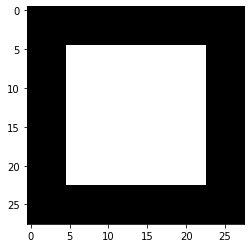



Final Output: 8

Prediction (Softmax) from the neural network:

 [[4.0240949e-01 9.8819210e-06 3.1811616e-03 2.9180399e-05 1.2110810e-03
  7.7177264e-04 7.4409746e-02 3.1149455e-06 5.1780826e-01 1.6628021e-04]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


---------------------------------------


1/1 [==============================] - 0s 25ms/step


---------------------------------------


=========PREDICTION============ 




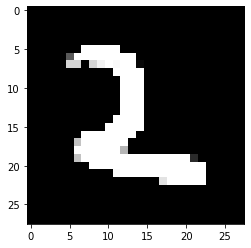



Final Output: 2

Prediction (Softmax) from the neural network:

 [[8.6843886e-11 1.5305642e-04 9.9983144e-01 6.1369524e-06 1.7230245e-09
  2.6278787e-10 3.4811679e-10 9.2282817e-06 1.7529294e-07 5.0730470e-13]]


Hard-maxed form of the prediction: 

 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------


1/1 [==============================] - 0s 26ms/step


---------------------------------------


=========PREDICTION============ 




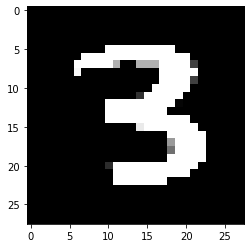



Final Output: 3

Prediction (Softmax) from the neural network:

 [[4.8081812e-25 1.6578589e-16 8.2243219e-11 1.0000000e+00 3.4392490e-21
  3.0591872e-14 5.7959447e-26 6.2454161e-12 6.7981907e-15 4.1447204e-18]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


---------------------------------------


1/1 [==============================] - 0s 17ms/step


---------------------------------------


=========PREDICTION============ 




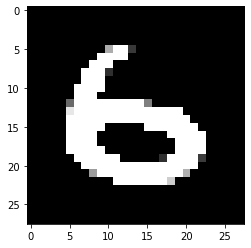



Final Output: 6

Prediction (Softmax) from the neural network:

 [[2.1877404e-05 7.2380617e-15 7.8020441e-13 2.1870899e-12 5.0216148e-10
  2.3361103e-04 9.9973923e-01 1.0113425e-15 5.2106652e-06 6.9666245e-10]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


---------------------------------------




In [41]:
for digit in preprocessed_digits:
    prediction = model.predict(digit.reshape(1, 28, 28, 1))   
    print ("\n\n---------------------------------------\n\n")
    print ("=========PREDICTION============ \n\n")
    plt.imshow(digit.reshape(28, 28), cmap="gray")
    plt.show()
    print("\n\nFinal Output: {}".format(np.argmax(prediction)))
    print ("\nPrediction (Softmax) from the neural network:\n\n {}".format(prediction))
    hard_maxed_prediction = np.zeros(prediction.shape)
    hard_maxed_prediction[0][np.argmax(prediction)] = 1
    print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))
    print ("\n\n---------------------------------------\n\n")